In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [4]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
# need to look at age, hypertension, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status, heart_disease, with stoke being response variable

df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

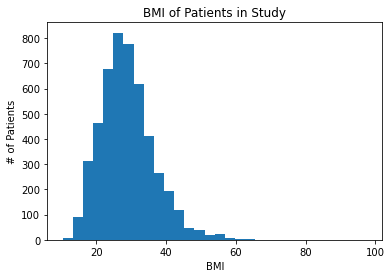

In [17]:
# start looking at variables BMI

plt.hist(df.bmi, bins = 30)

plt.ylabel('# of Patients')
plt.xlabel('BMI')
plt.title('BMI of Patients in Study');
df.bmi.describe()


,id
gender,
Female,2994
Male,2115
Other,1


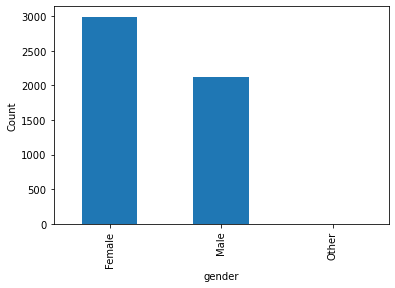

In [14]:
# looking at gender count

df.groupby([ 'gender'])['id'].count().plot(kind='bar').set_ylabel('Count')
df.groupby(['gender' ])[['id']].count()

count    5110.000000
mean       43.226614
std        22.612647
min         0.080000
25%        25.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: age, dtype: float64

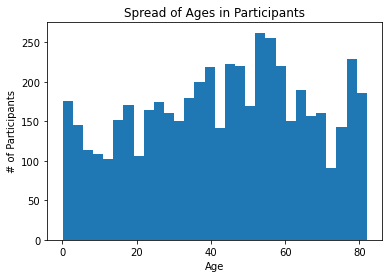

In [19]:
# age, 
# looking at age
plt.hist(df.age, bins = 30)
plt.ylabel('# of Participants')
plt.xlabel('Age')
plt.title('Spread of Ages in Participants')
df.age.describe()

,mean,std
stroke,,
0,41.971545,22.291940
1,67.728193,12.727419


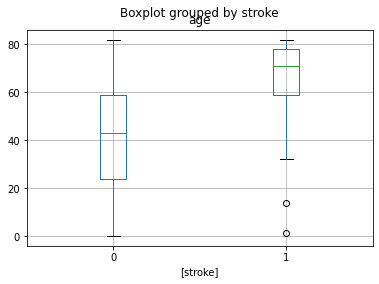

In [44]:
df.boxplot(column=['age'],by = ['stroke'])
pd.DataFrame(df.groupby( ['stroke'])['age'].describe().loc[:,['mean','std']])

,id
hypertension,
0,4612
1,498


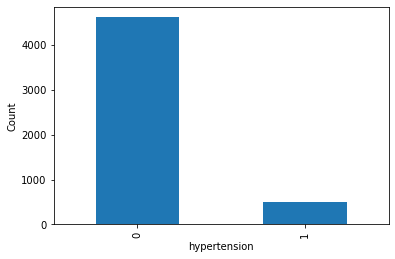

In [21]:
# look at count of patients that have hypertension
df.groupby([ 'hypertension'])['id'].count().plot(kind='bar').set_ylabel('Count')
df.groupby(['hypertension' ])[['id']].count()

,id
ever_married,
No,1757
Yes,3353


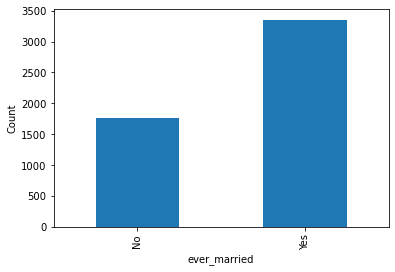

In [22]:
# ever_married, 
df.groupby([ 'ever_married'])['id'].count().plot(kind='bar').set_ylabel('Count')
df.groupby(['ever_married' ])[['id']].count()

,stroke
ever_married,
No,0.016505
Yes,0.065613


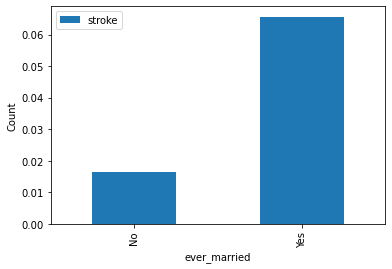

In [54]:
# martial status and stroke
df.groupby([ 'ever_married'])[['stroke']].mean().plot(kind='bar').set_ylabel('Count')
df.groupby(['ever_married' ])[['stroke']].mean()

### Figure 1

count        5110
unique          5
top       Private
freq         2925
Name: work_type, dtype: object

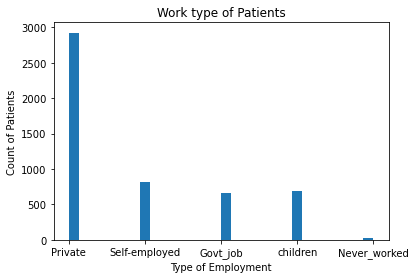

In [39]:
# work_type, Residence_type, avg_glucose_level, bmi, smoking_status, heart_disease
plt.hist(df.work_type, bins = 30)
plt.ylabel('Count of Patients')
plt.xlabel('Type of Employment')
plt.title('Work type of Patients')
df.work_type.describe()

,id
work_type,
Govt_job,657
Never_worked,22
Private,2925
Self-employed,819
children,687


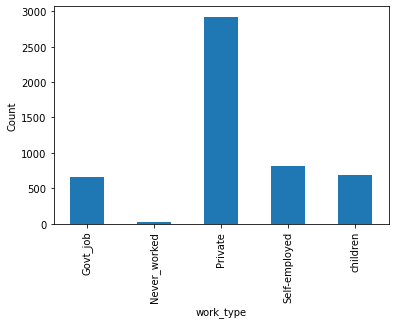

In [27]:
# count of work types
df.groupby([ 'work_type'])['id'].count().plot(kind='bar').set_ylabel('Count')
df.groupby(['work_type' ])[['id']].count()

,stroke
work_type,
Govt_job,0.050228
Never_worked,0.000000
Private,0.050940
Self-employed,0.079365
children,0.002911


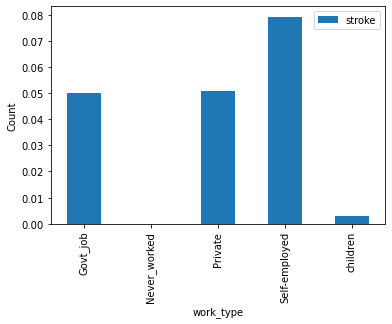

In [55]:
# work type and stroke
df.groupby([ 'work_type'])[['stroke']].mean().plot(kind='bar').set_ylabel('Count')
df.groupby(['work_type' ])[['stroke']].mean()

count    5110.000000
mean      106.147677
std        45.283560
min        55.120000
25%        77.245000
50%        91.885000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64

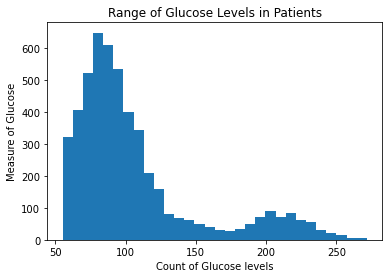

In [37]:
# avg_glucose_level, bmi, smoking_status, heart_disease
plt.hist(df.avg_glucose_level, bins = 30)
plt.ylabel('Measure of Glucose')
plt.xlabel('Count of Glucose levels')
plt.title('Range of Glucose Levels in Patients')
df.avg_glucose_level.describe()

,id
avg_glucose_level,
55.12,1
55.22,1
55.23,1
55.25,1
55.26,1
...,...
266.59,1
267.60,1
267.61,1


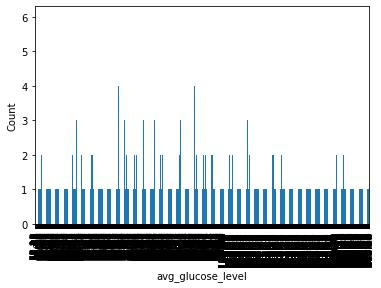

In [33]:
df.groupby(['avg_glucose_level'])['id'].count().plot(kind = 'bar').set_ylabel('Count')
df.groupby(['avg_glucose_level'])[['id']].count()

count             5110
unique               4
top       never smoked
freq              1892
Name: smoking_status, dtype: object

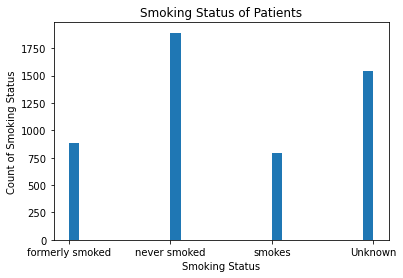

In [36]:
# smoking_status, heart_disease
plt.hist(df.smoking_status, bins = 30)
plt.xlabel('Smoking Status')
plt.ylabel('Count of Smoking Status')
plt.title('Smoking Status of Patients')
df.smoking_status.describe()

,id
heart_disease,
0,4834
1,276


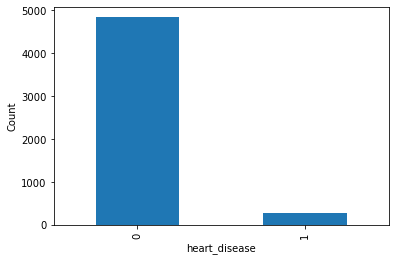

In [42]:
df.groupby(['heart_disease'])['id'].count().plot(kind = 'bar').set_ylabel('Count')
df.groupby(['heart_disease'])[['id']].count()

make relation between stroke and variables
if its a continuous variable make box plot
t tests, and comapare distributions
with 2 categorical variables use chi square test
two numerical correlation
ANOVA, and log scale

,stroke
heart_disease,
0,0.041787
1,0.170290


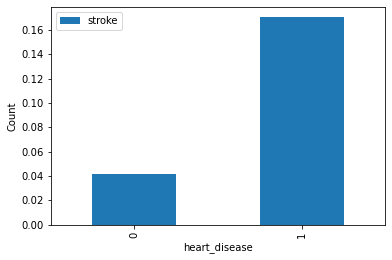

In [43]:
# heart disease and stroke 
df.groupby([ 'heart_disease'])[['stroke']].mean().plot(kind='bar').set_ylabel('Count')
df.groupby(['heart_disease' ])[['stroke']].mean()


,stroke
work_type,
Govt_job,0.050228
Never_worked,0.000000
Private,0.050940
Self-employed,0.079365
children,0.002911


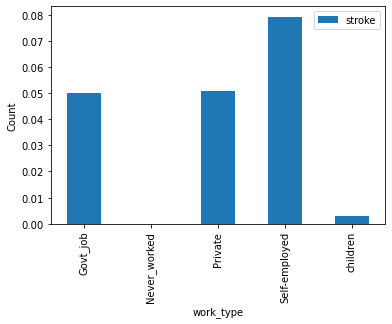

In [48]:
# work type and stroke
df.groupby([ 'work_type'])[['stroke']].mean().plot(kind='bar').set_ylabel('Count')
df.groupby(['work_type' ])[['stroke']].mean()

,stroke
Residence_type,
Rural,0.045346
Urban,0.052003


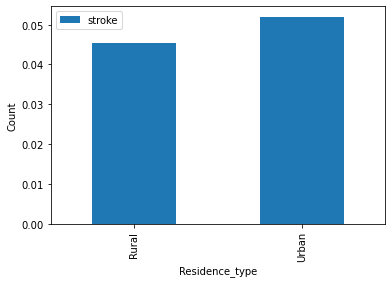

In [50]:
# residence type and stroke
df.groupby([ 'Residence_type'])[['stroke']].mean().plot(kind='bar').set_ylabel('Count')
df.groupby(['Residence_type' ])[['stroke']].mean()

,stroke
smoking_status,
Unknown,0.030440
formerly smoked,0.079096
never smoked,0.047569
smokes,0.053232


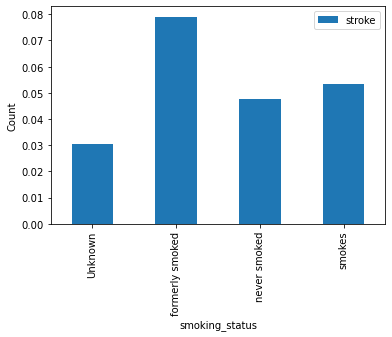

In [52]:
# smoking and stroke
df.groupby([ 'smoking_status'])[['stroke']].mean().plot(kind='bar').set_ylabel('Count')
df.groupby(['smoking_status' ])[['stroke']].mean()

,stroke
hypertension,
0,0.039679
1,0.132530


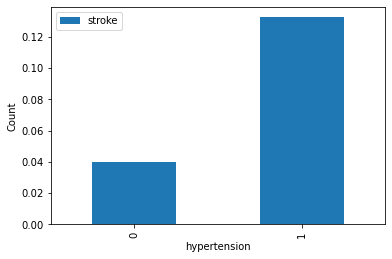

In [53]:
# hypertension stroke
df.groupby([ 'hypertension'])[['stroke']].mean().plot(kind='bar').set_ylabel('Count')
df.groupby(['hypertension' ])[['stroke']].mean()